In [1]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
os.chdir('/home/ulf/Programming/teufel')

In [3]:
!ls

build			    fel-modulation_initial.h5  setup.dox
clean_tests		    fel-modulation_start.h5    slurm.teufel.sh
CMakeLists.txt		    fel-modulation_stop.h5     src
doc			    lib			       tests
examples		    LICENSE		       teufel_bunch_start.sdds
fel1d.hdf5		    matching.sdds	       ToDo
fel1d-modulation_beam.sdds  rad_push_log.sdds	       undulator_traj.hdf5
fel1d_trajectories.hdf5     README.md		       warnings.dox
fel-modulation_beam.sdds    run_tests
fel-modulation_final.h5     scripts


In [4]:
hdf = h5py.File('undulator_traj.hdf5', "r")
print(hdf)


<HDF5 file "undulator_traj.hdf5" (mode r)>


In [5]:
# Get the group
traj = hdf['Trajectories']
NOTS = traj.attrs.get('NOTS')
NOP = traj.attrs.get('NOP')
print(NOTS, NOP)
a = np.array(traj)
print(a.shape)

3001 1
(3001, 1, 6)


In [7]:
hdf.close()

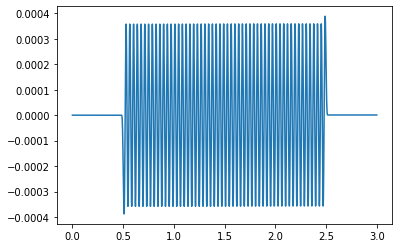

In [6]:
x = a[:,0,0]
z = a[:,0,2]
plt.plot(z,x)
plt.show()

In [8]:
hdf = h5py.File('fel1d_trajectories.hdf5', "r")
print(hdf)


<HDF5 file "fel1d_trajectories.hdf5" (mode r)>


In [9]:
# Get the group
traj = hdf['Trajectories']
NOTS = traj.attrs.get('NOTS')
NOP = traj.attrs.get('NOP')
print(NOTS, NOP)
a = np.array(traj)
print(a.shape)

5004 100
(5004, 100, 6)


In [10]:
hdf.close()

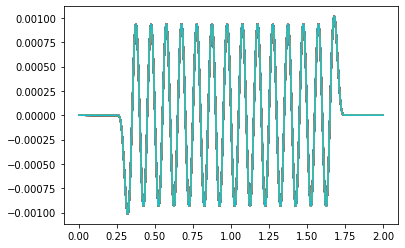

In [12]:
for ip in range(NOP):
    x = a[:,ip,0]
    z = a[:,ip,2]
    plt.plot(z,x)
plt.show()

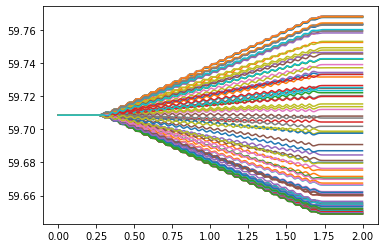

In [13]:
for ip in range(NOP):
    bgx = a[:,ip,3]
    bgy = a[:,ip,4]
    bgz = a[:,ip,5]
    gamma = np.sqrt(1.0 + np.square(bgx) + np.square(bgy) + np.square(bgz))
    z = a[:,ip,2]
    plt.plot(z,gamma)
plt.show()

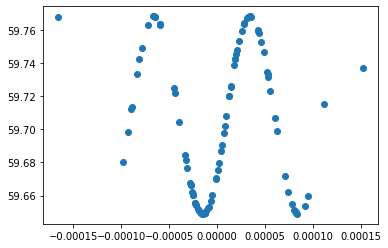

In [15]:
z0 = a[0,:,2]
bgx = a[-1,:,3]
bgy = a[-1,:,4]
bgz = a[-1,:,5]
gamma = np.sqrt(1.0 + np.square(bgx) + np.square(bgy) + np.square(bgz))
plt.scatter(z0, gamma)
plt.show()